> https://bcho.tistory.com/1203?category=555440

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv('data/최종.csv', encoding = 'euc_kr')
df.head(3)

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,사업체수,총인구수
0,이호동,55071,114543,269222,281,4654
1,도두동,65333,141161,441864,991,3257
2,봉개동,75072,393438,362387,269,4936


In [5]:
features = df.loc[:, ['주차수요량', '카드이용자수', '사업체수', '총인구수']]
features.head(3)

,주차수요량,카드이용자수,사업체수,총인구수
0,55071,269222,281,4654
1,65333,441864,991,3257
2,75072,362387,269,4936


# 군집수 판단

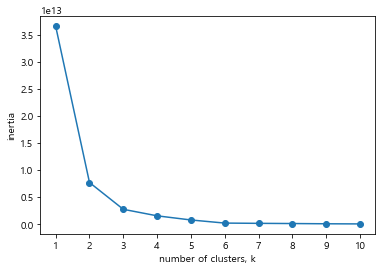

In [6]:
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(features)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.show()

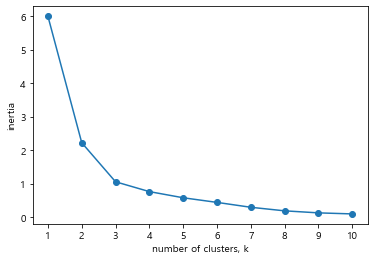

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
minmaxdata= scaler.fit_transform(features)

kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)

plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()


In [8]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(features)

predict = pd.DataFrame(model.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [9]:
r = pd.concat([df['읍면동'] ,features, predict], axis = 1)
r

,읍면동,주차수요량,카드이용자수,사업체수,총인구수,군집
0,이호동,55071,269222,281,4654,1
1,도두동,65333,441864,991,3257,1
2,봉개동,75072,362387,269,4936,1
3,외도동,75466,944828,1185,21741,1
4,삼양동,78848,1042792,1000,25153,1
5,건입동,113170,763641,750,9857,1
6,화북동,130560,1025585,1546,25391,1
7,구좌읍,146522,952715,1738,16283,1
8,한림읍,233952,1377325,2174,25003,1
9,오라동,183289,854466,978,14906,1


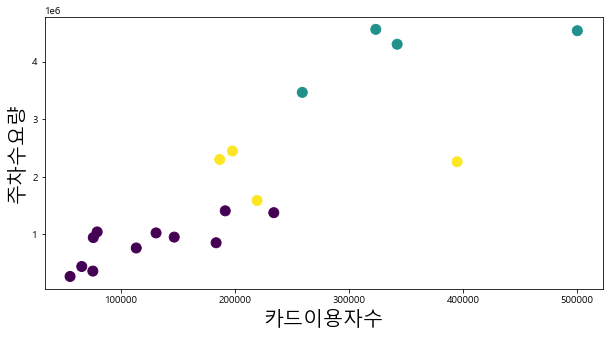

In [13]:
plt.figure(figsize=(10,5))
plt.xlabel('카드이용자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['군집'], alpha = 5, s = 100)
plt.show()

In [ ]:
# centers = pd.DataFrame(model.cluster_centers_, columns = ['주차수요량', '카드이용자수'])
# center_x = centers['주차수요량']
# center_y = centers['카드이용자수']
# plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['predict'], alpha = 0.5)
# plt.scatter(center_x, center_y, s=50, marker='D', c ='r')
# plt.show()

# 스케일링

In [22]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [23]:
pipeline.fit(features)
predict = pd.DataFrame(pipeline.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,3
9,2


In [24]:
a = pd.concat([df['읍면동'] ,features, predict], axis = 1)
a

,읍면동,주차수요량,카드이용자수,사업체수,총인구수,군집
0,이호동,55071,269222,281,4654,2
1,도두동,65333,441864,991,3257,2
2,봉개동,75072,362387,269,4936,2
3,외도동,75466,944828,1185,21741,2
4,삼양동,78848,1042792,1000,25153,2
5,건입동,113170,763641,750,9857,2
6,화북동,130560,1025585,1546,25391,2
7,구좌읍,146522,952715,1738,16283,2
8,한림읍,233952,1377325,2174,25003,3
9,오라동,183289,854466,978,14906,2


In [25]:
a.to_csv('kmeans.csv', encoding = 'euc_kr')

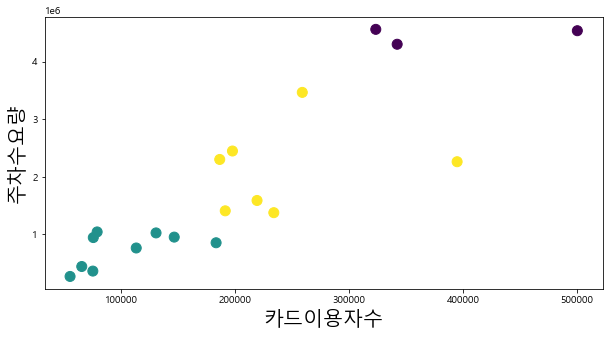

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel('카드이용자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(a['주차수요량'], a['카드이용자수'], c = a['군집'], alpha = 10, s = 100)
plt.show()